# Climate Change Prediction
------------------------------
This is main code of the of Climate Change Prediction System which will predict the temperature in the future and predict how much it will change by. This is not a 100% accurate so use at your own risk.

---------------------
# Add all the necessary libraries

In [2]:
import numpy as np
import pandas as pd # Pandas are Fluffy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import copy

---------------------
# Data

---------------------------

Source : GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.

---------------------------

-------------------------------------------
Load the CSV data.

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA
1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19,-0.18,-0.19,-0.19,-0.12,-0.17,-0.20
1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18
1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19
1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29


---------------------------
Split the dataset into training and testing dataset.

In [19]:
train, test = np.split(df.sample(frac=1), [int(0.8*len(df))])



---------------------------
Create a function that will get your x and y labels. It also checks if there is a no x value passed and if there is no x value passed then 
use all the columns. If not then use the one column specified by programer.



In [20]:
# Create a function that will get the x and y labels
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label ]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

---------------------------
Make a training and testing for X and y.

In [ ]:
_, X_train, Y_train = get_xy(train, "Year", x_labels=df.columns[1:])

_, X_test, Y_test = get_xy(test, "Year", x_labels=df.columns[1:])

---------------------------------
# Make the linear regressor and fit it with the training dataset.

In [22]:
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)

LinearRegression()

Score it so I see the accuracy.

In [23]:
reg_model.score(X=X_test, y=Y_test)

0.9870788632573175

-----------------------------------------------
# Make a graph that will show the best line of fit and another graph showing the predictions.

In [24]:
y_predictions = reg_model.predict(X_test)

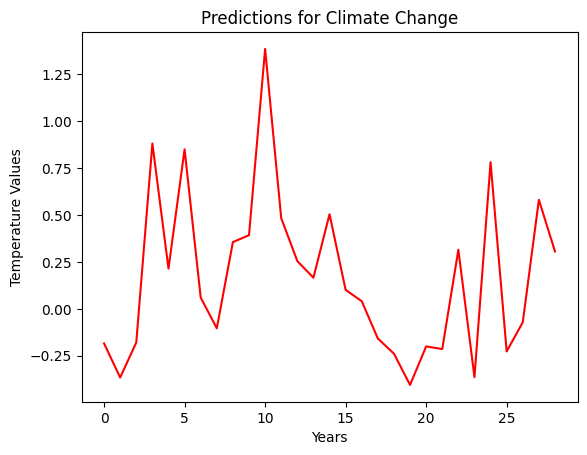

In [42]:
plt.plot(y_predictions, color="red")
plt.title("Predictions for Climate Change")
plt.xlabel("Years")
plt.ylabel("Temperature Values")
plt.show()